In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import skgeom

from pathlib import Path

import enclosed_csf_list
import _image_curve
import _image_processing

In [50]:
import importlib
importlib.reload(enclosed_csf_list)
importlib.reload(_image_curve)
importlib.reload(_image_processing)

<module '_image_processing' from 'C:\\Users\\ghage\\PycharmProjects\\enclosedcurveshorteningflow\\_image_processing.py'>

In [2]:
ecsf_pickle_file = r"C:\Users\ghage\PycharmProjects\enclosedcurveshorteningflow\out\ecsfs\ecsfs.pickle"

In [3]:
with open(ecsf_pickle_file, 'rb') as f:
    ecsfs = pickle.load(f)

In [34]:
image_matrices = []
for curves in ecsfs:
    image_matrices.append(enclosed_csf_list.to_image_matrix(curves))

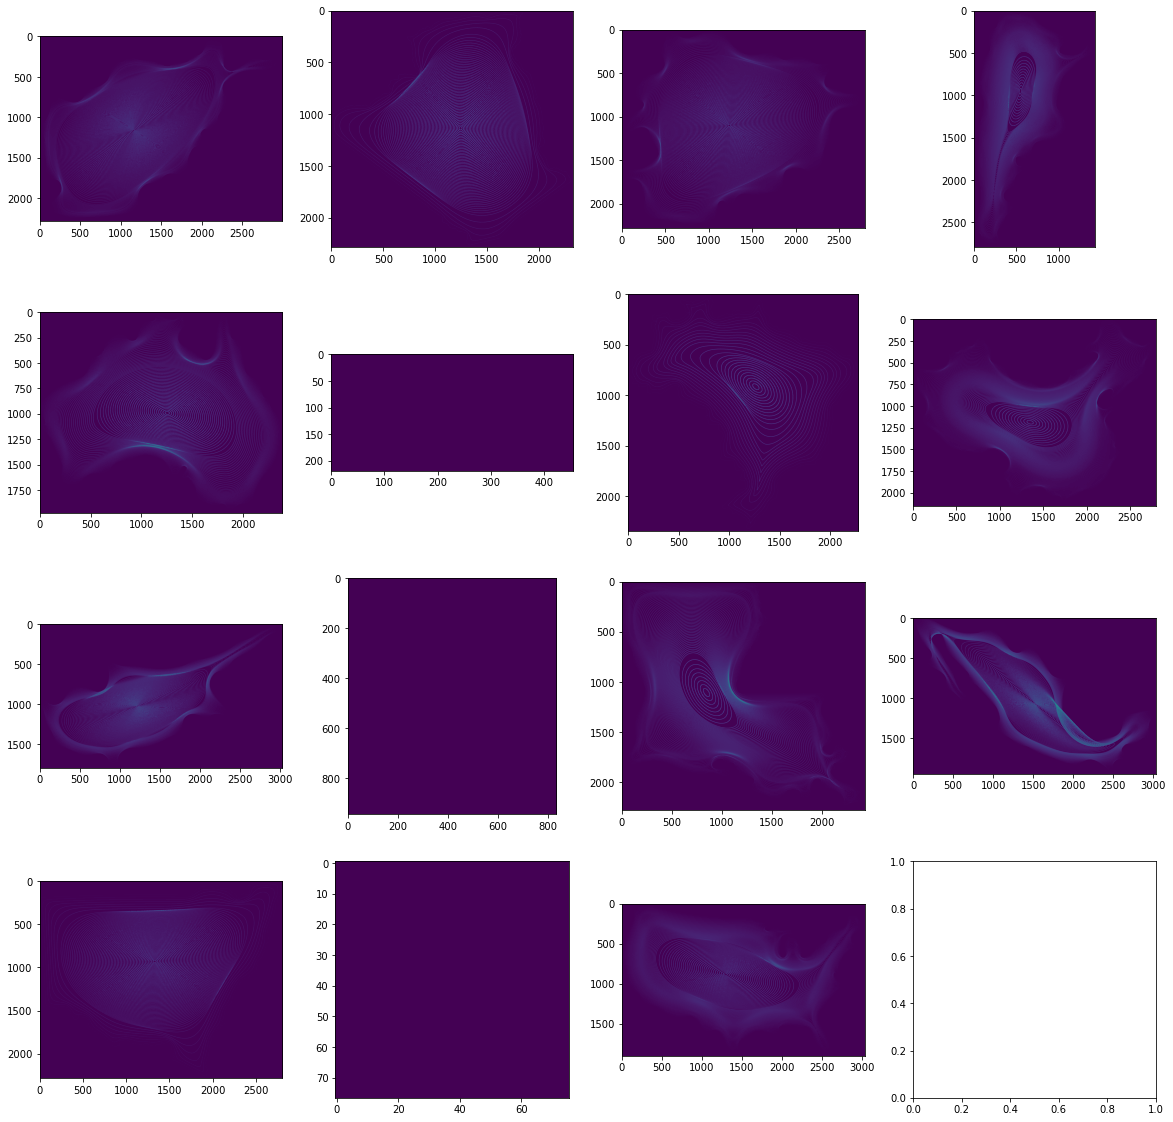

In [40]:
_, axs = plt.subplots(4, 4, figsize=(20, 20))
for i, im in enumerate(image_matrices):
    axs[i//4, i%4].imshow(im)

In [53]:
path = Path("out/curves/silhouettes/")
path.mkdir(parents=True, exist_ok=True)
for i, im in enumerate(image_matrices):
    _image_processing.save_image(im.astype(np.uint8), str(path) + "/image_curve_" + str(i) + "_")

In [61]:
image_matrices_const = [np.where(image_matrix > 0, 0, 255) for image_matrix in image_matrices]

In [62]:
path = Path("out/curves/silhouettes_constant_values")
path.mkdir(parents=True, exist_ok=True)
for i, im in enumerate(image_matrices_const):
    _image_processing.save_image(im.astype(np.uint8), str(path) + "/image_curve_" + str(i) + "_")

In [65]:
image_matrices_10 = []
for curves in ecsfs:
    image_matrices_10.append(enclosed_csf_list.to_image_matrix(curves[::10]))

In [67]:
image_matrices_10 = [np.where(image_matrix > 0, 0, 255) for image_matrix in image_matrices_10]

In [68]:
path = Path("out/curves/silhouettes_constant_values_10_curves")
path.mkdir(parents=True, exist_ok=True)
for i, im in enumerate(image_matrices_10):
    _image_processing.save_image(im.astype(np.uint8), str(path) + "/image_curve_" + str(i) + "_")